In [1]:
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
# import pandas as pd
loop = 100
seed = 244823
samples = 2423
noise = 16

In [2]:
x, y = datasets.make_regression(n_features=1, random_state=seed, n_samples=samples, noise=noise)
x = (x - np.min(x))/(np.max(x)-np.min(x))
y = (y - np.min(y))/(np.max(y)-np.min(y))
poly = PolynomialFeatures(1)
x = poly.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, train_size=0.8, random_state=seed)

# Metoda analityczna

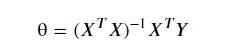

In [3]:
xt = np.transpose(xtrain)
xtx=np.matmul(xt, xtrain)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain)
theta = np.matmul(xtxinv, xty)

In [4]:
start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain), xtrain)), np.matmul(np.transpose(xtrain), ytrain))
end_time_anal = (time.time() - start_time)/loop
print(f'Czas całkowity 100 wykonań metody analitycznej wynosi {round((end_time_anal*1000),5)} ms')

Czas całkowity 100 wykonań metody analitycznej wynosi 0.06011 ms


# Metoda numeryczna
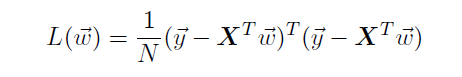

In [5]:
def numeric(theta, x, y):
    xt_times_theta = np.matmul(x, theta)
    xt_times_theta_minus_y = np.subtract(y, xt_times_theta)
    transposed = xt_times_theta_minus_y.transpose()
    final = np.matmul(xt_times_theta_minus_y, transposed)
    return final / len(x)

In [6]:
start_time = time.time()
for i in range(loop):
    answernum = scipy.optimize.minimize(numeric,[1,1], args=(xtrain, ytrain), method="Powell")
end_time_num = (time.time() - start_time)/loop
print(f'Czas całkowity 100 wykonań metody numerycznej wynosi {round((end_time_num*1000),5)} ms')

Czas całkowity 100 wykonań metody numerycznej wynosi 2.73077 ms


In [7]:
xtrain = np.delete(xtrain,0,1)
xtest = np.delete(xtest,0,1)

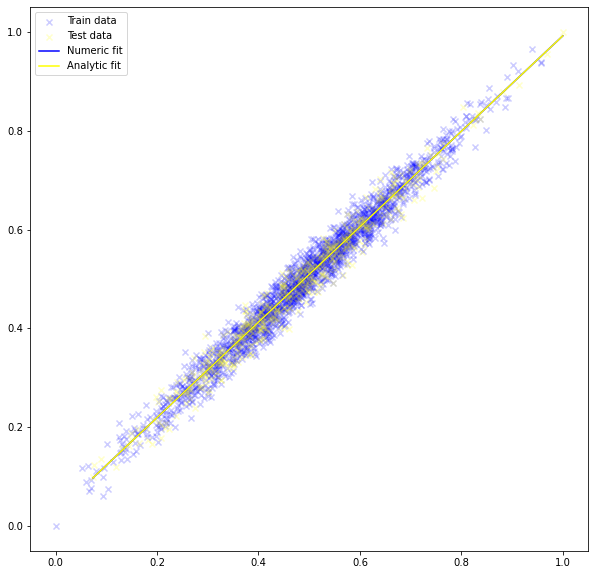

In [8]:
ynum1 = answernum.x[1]*np.min(xtest)+answernum.x[0]
ynum2 = answernum.x[1]*np.max(xtest)+answernum.x[0]
yanal1 = theta[1]*np.min(xtest)+theta[0]
yanal2 = theta[1]*np.max(xtest)+theta[0]

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(xtrain, ytrain, alpha=0.2, color='blue', label = 'Train data', marker='x')
plt.scatter(xtest, ytest, alpha=0.2, color='yellow', label = 'Test data', marker='x')
plt.plot([np.min(xtest),np.max(xtest)],[ynum1,ynum2], label='Numeric fit', color='blue')
plt.plot([np.min(xtest),np.max(xtest)],[yanal1,yanal2], label='Analytic fit', color='yellow')
ax = plt.gca()
# ax.set_facecolor((0.1, 0.9, 0.3))
plt.legend()
plt.show()

In [9]:
xtest=np.ndarray.tolist(xtest)
ytest=np.ndarray.tolist(ytest)

In [10]:
ypredicted_anal = []
ypredicted_num = []
xtestlepszy =[]
for i in xtest:
    xtestlepszy += [i][0]
for i in xtestlepszy:
    ypredicted_anal.append(i*theta[1]+theta[0])
for i in xtestlepszy:
    ypredicted_num.append(i*answernum.x[1]+answernum.x[0])
mseanal = np.square(np.subtract(ytest,ypredicted_anal)).mean()
msenum = np.square(np.subtract(ytest,ypredicted_num)).mean()
print(f'Średni błąd kwadratowy metody analitycznej wynosi {mseanal}')
print(f'Średni błąd kwadratowy metody numerycznej wynosi {msenum}')

Średni błąd kwadratowy metody analitycznej wynosi 0.0006233498318288877
Średni błąd kwadratowy metody numerycznej wynosi 0.0006233498326894617


# ---------------------------------------------------------------------------------------------------------------

# Flapped Bird

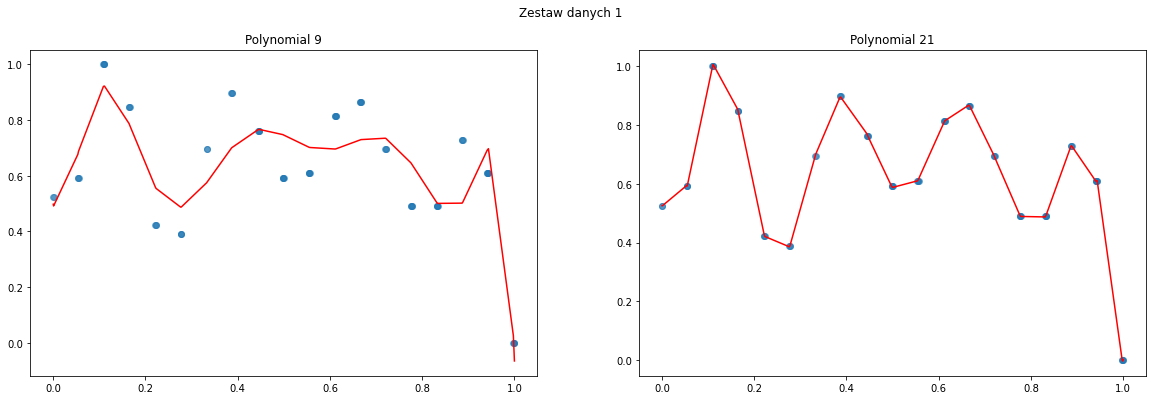

In [11]:
flp1 = np.genfromtxt('1.csv', delimiter=',')

xset=np.reshape(flp1[:,0], (len(flp1),1))
yset=np.reshape(flp1[:,1], (len(flp1),1))
xset = (xset - np.min(xset))/(np.max(xset)-np.min(xset))
yset = (yset - np.min(yset))/(np.max(yset)-np.min(yset))

poly9 = PolynomialFeatures(9).fit_transform(xset)
poly21 = PolynomialFeatures(21).fit_transform(xset)
model9 = linear_model.LinearRegression()
model21 = linear_model.LinearRegression()
model9.fit(poly9, yset)
model21.fit(poly21, yset)
ypredicted9 = model9.predict(poly9)
ypredicted21 = model21.predict(poly21)

plt.rcParams['figure.figsize'] = [20, 6]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(xset,yset, alpha = 0.5)
ax2.scatter(xset,yset, alpha = 0.5)
fig.suptitle('Zestaw danych 1')
ax1.plot(xset, ypredicted9, color='r')
ax2.plot(xset, ypredicted21, color='r')
ax1.title.set_text('Polynomial 9')
ax2.title.set_text('Polynomial 21')
plt.show()

In [12]:
start_time = time.time()
for i in range(loop):
    answeranal = model9.fit(poly9, yset)
timeflap9zb1 = (time.time() - start_time)/loop
start_time = time.time()
for i in range(loop):
    answeranal = model21.fit(poly21, yset)
timeflap21zb1 = (time.time() - start_time)/loop
mseflap9zb1 = np.square(np.subtract(yset,ypredicted9)).mean()
mseflap21zb1 = np.square(np.subtract(yset,ypredicted21)).mean()

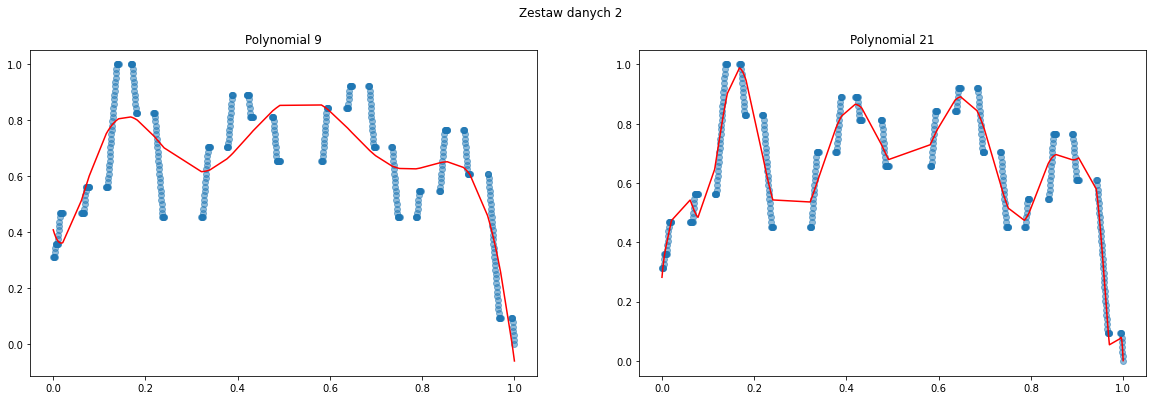

In [13]:
flp2 = np.genfromtxt('2.csv', delimiter=',')
xset=np.reshape(flp2[:,0], (len(flp2),1))
yset=np.reshape(flp2[:,1], (len(flp2),1))
xset = (xset - np.min(xset))/(np.max(xset)-np.min(xset))
yset = (yset - np.min(yset))/(np.max(yset)-np.min(yset))

poly9 = PolynomialFeatures(9).fit_transform(xset)
poly21 = PolynomialFeatures(21).fit_transform(xset)
model9 = linear_model.LinearRegression()
model21 = linear_model.LinearRegression()
model9.fit(poly9, yset)
model21.fit(poly21, yset)
ypredicted9 = model9.predict(poly9)
ypredicted21 = model21.predict(poly21)

plt.rcParams['figure.figsize'] = [20, 6]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(xset,yset, alpha = 0.5)
ax2.scatter(xset,yset, alpha = 0.5)
fig.suptitle('Zestaw danych 2')
ax1.plot(xset, ypredicted9, color='r')
ax2.plot(xset, ypredicted21, color='r')
ax1.title.set_text('Polynomial 9')
ax2.title.set_text('Polynomial 21')
plt.show()

In [14]:
start_time = time.time()
for i in range(loop):
    answeranal = model9.fit(poly9, yset)
timeflap9zb2 = (time.time() - start_time)/loop
start_time = time.time()
for i in range(loop):
    answeranal = model21.fit(poly21, yset)
timeflap21zb2 = (time.time() - start_time)/loop
mseflap9zb2 = np.square(np.subtract(yset,ypredicted9)).mean()
mseflap21zb2 = np.square(np.subtract(yset,ypredicted21)).mean()

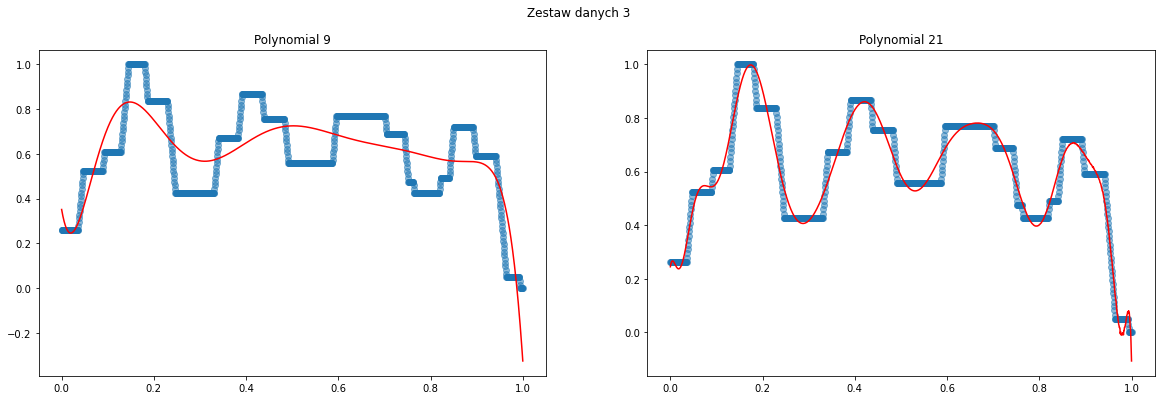

In [15]:
flp3 = np.genfromtxt('3.csv', delimiter=',')

xset=np.reshape(flp3[:,0], (len(flp3),1))
yset=np.reshape(flp3[:,1], (len(flp3),1))
xset = (xset - np.min(xset))/(np.max(xset)-np.min(xset))
yset = (yset - np.min(yset))/(np.max(yset)-np.min(yset))

poly9 = PolynomialFeatures(9).fit_transform(xset)
poly21 = PolynomialFeatures(21).fit_transform(xset)
model9 = linear_model.LinearRegression()
model21 = linear_model.LinearRegression()
model9.fit(poly9, yset)
model21.fit(poly21, yset)
ypredicted9 = model9.predict(poly9)
ypredicted21 = model21.predict(poly21)

plt.rcParams['figure.figsize'] = [20, 6]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(xset,yset, alpha = 0.5)
ax2.scatter(xset,yset, alpha = 0.5)
fig.suptitle('Zestaw danych 3')
ax1.plot(xset, ypredicted9, color='r')
ax2.plot(xset, ypredicted21, color='r')
ax1.title.set_text('Polynomial 9')
ax2.title.set_text('Polynomial 21')
plt.show()

In [16]:
start_time = time.time()
for i in range(loop):
    answeranal = model9.fit(poly9, yset)
timeflap9zb3 = (time.time() - start_time)/loop
start_time = time.time()
for i in range(loop):
    answeranal = model21.fit(poly21, yset)
timeflap21zb3 = (time.time() - start_time)/loop
mseflap9zb3 = np.square(np.subtract(yset,ypredicted9)).mean()
mseflap21zb3 = np.square(np.subtract(yset,ypredicted21)).mean()

# Analityczny flappy

In [17]:
flp1 = np.genfromtxt('1.csv', delimiter=',')

xset=np.reshape(flp1[:,0], (len(flp1),1))
yset=np.reshape(flp1[:,1], (len(flp1),1))
xset = (xset - np.min(xset))/(np.max(xset)-np.min(xset))
yset = (yset - np.min(yset))/(np.max(yset)-np.min(yset))

xtrain9, xtest9, ytrain9, ytest9 = train_test_split(xset,yset, test_size=0.2, train_size=0.8, random_state=seed)
xtrain21, xtest21, ytrain21, ytest21 = train_test_split(xset,yset, test_size=0.2, train_size=0.8, random_state=seed)

poly9 = PolynomialFeatures(9).fit_transform(xtrain9)
poly21 = PolynomialFeatures(21).fit_transform(xtrain21)
poly9test = PolynomialFeatures(9).fit_transform(xtest9)
poly21test= PolynomialFeatures(21).fit_transform(xtest21)

In [18]:
xt = np.transpose(poly9)
xtx=np.matmul(xt, poly9)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain9)
theta9 = np.matmul(xtxinv, xty)

xt = np.transpose(poly21)
xtx=np.matmul(xt, poly21)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain21)
theta21 = np.matmul(xtxinv, xty)

In [19]:
start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain9), xtrain9)), np.matmul(np.transpose(xtrain9), ytrain9))
timeanal9zb1 = (time.time() - start_time)/loop

start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain21), xtrain21)), np.matmul(np.transpose(xtrain21), ytrain21))
timeanal21zb1 = (time.time() - start_time)/loop

In [20]:
ypredictedtrain9 = np.sum(np.matmul(poly9test, theta9), axis=1)
ypredictedtrain21 = np.sum(np.matmul(poly21test, theta21), axis=1)
xtest9plot, ypredictedtrain9 = zip(*sorted(zip(xtest9, ypredictedtrain9)))
xtest21plot, ypredictedtrain21 = zip(*sorted(zip(xtest21, ypredictedtrain21)))
mseanal9zb1 = np.square(np.subtract(ytest9,ypredictedtrain9)).mean()
mseanal21zb1 = np.square(np.subtract(ytest21,ypredictedtrain21)).mean()

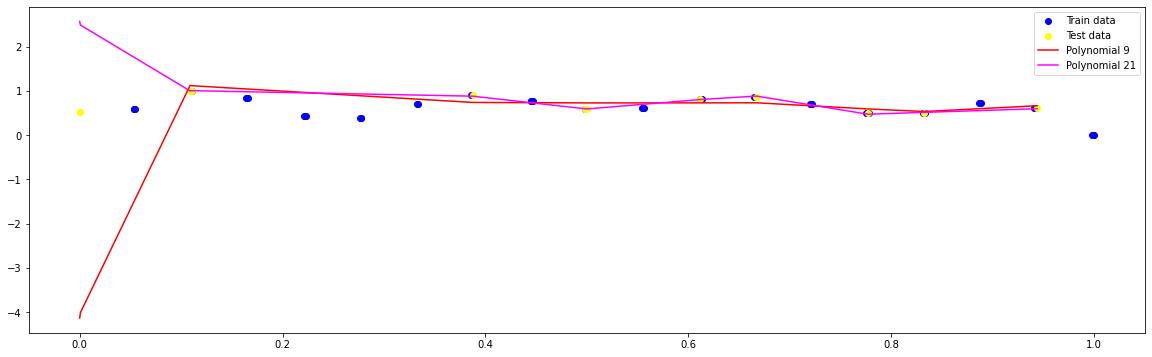

In [21]:
plt.scatter(xtrain9, ytrain9, alpha=1, color='blue', label = 'Train data', marker='o')
plt.scatter(xtest9, ytest9, alpha=1, color='yellow', label = 'Test data', marker='o')
plt.plot(xtest9plot, ypredictedtrain9, label='Polynomial 9', color='red')
plt.plot(xtest21plot, ypredictedtrain21, label='Polynomial 21', color='magenta')
ax = plt.gca()
# ax.set_facecolor((0.1, 0.9, 0.3))
plt.legend()
plt.show()

Czas całkowity 100 wykonań metodą analityczną z wielomianem 9 wynosi 0.03999 ms
Czas całkowity 100 wykonań metodą analityczną z wielomianem 21 wynosi 0.04001 ms


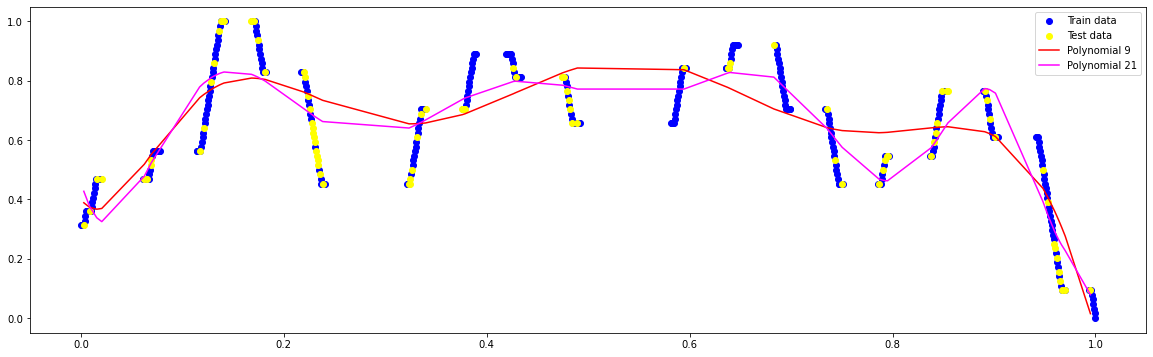

In [22]:
flp2 = np.genfromtxt('2.csv', delimiter=',')

xset=np.reshape(flp2[:,0], (len(flp2),1))
yset=np.reshape(flp2[:,1], (len(flp2),1))
xset = (xset - np.min(xset))/(np.max(xset)-np.min(xset))
yset = (yset - np.min(yset))/(np.max(yset)-np.min(yset))

xtrain9, xtest9, ytrain9, ytest9 = train_test_split(xset,yset, test_size=0.2, train_size=0.8, random_state=seed)
xtrain21, xtest21, ytrain21, ytest21 = train_test_split(xset,yset, test_size=0.2, train_size=0.8, random_state=seed)

poly9 = PolynomialFeatures(9).fit_transform(xtrain9)
poly21 = PolynomialFeatures(21).fit_transform(xtrain21)
poly9test = PolynomialFeatures(9).fit_transform(xtest9)
poly21test= PolynomialFeatures(21).fit_transform(xtest21)

xt = np.transpose(poly9)
xtx=np.matmul(xt, poly9)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain9)
theta9 = np.matmul(xtxinv, xty)

xt = np.transpose(poly21)
xtx=np.matmul(xt, poly21)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain21)
theta21 = np.matmul(xtxinv, xty)

start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain9), xtrain9)), np.matmul(np.transpose(xtrain9), ytrain9))
timeanal9zb2 = (time.time() - start_time)/loop
print(f'Czas całkowity 100 wykonań metodą analityczną z wielomianem 9 wynosi {round((timeanal9zb2*1000),5)} ms')

start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain21), xtrain21)), np.matmul(np.transpose(xtrain21), ytrain21))
timeanal21zb2 = (time.time() - start_time)/loop
print(f'Czas całkowity 100 wykonań metodą analityczną z wielomianem 21 wynosi {round((timeanal21zb2*1000),5)} ms')

ypredictedtrain9 = np.sum(np.matmul(poly9test, theta9), axis=1)
ypredictedtrain21 = np.sum(np.matmul(poly21test, theta21), axis=1)
xtest9plot, ypredictedtrain9 = zip(*sorted(zip(xtest9, ypredictedtrain9)))
xtest21plot, ypredictedtrain21 = zip(*sorted(zip(xtest21, ypredictedtrain21)))
mseanal9zb2 = np.square(np.subtract(ytest9,ypredictedtrain9)).mean()
mseanal21zb2 = np.square(np.subtract(ytest21,ypredictedtrain21)).mean()

plt.scatter(xtrain9, ytrain9, alpha=1, color='blue', label = 'Train data', marker='o')
plt.scatter(xtest9, ytest9, alpha=1, color='yellow', label = 'Test data', marker='o')
plt.plot(xtest9plot, ypredictedtrain9, label='Polynomial 9', color='red')
plt.plot(xtest21plot, ypredictedtrain21, label='Polynomial 21', color='magenta')
ax = plt.gca()
# ax.set_facecolor((0.1, 0.9, 0.3))
plt.legend()
plt.show()

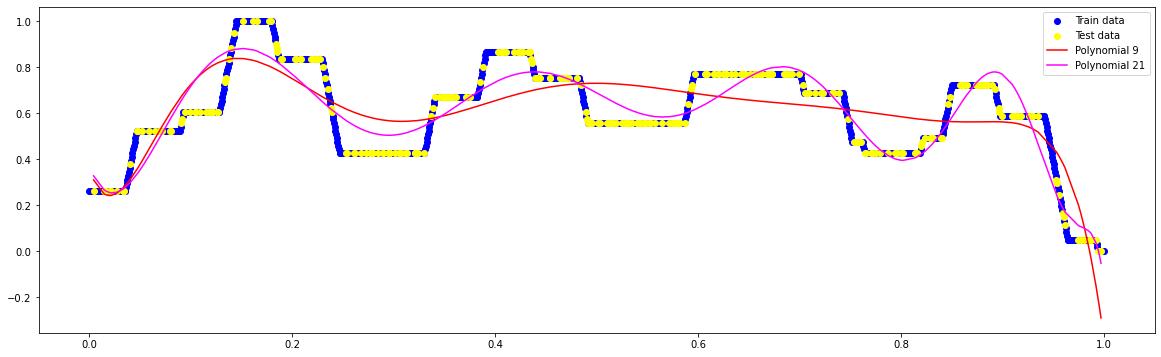

In [23]:
flp3 = np.genfromtxt('3.csv', delimiter=',')

xset=np.reshape(flp3[:,0], (len(flp3),1))
yset=np.reshape(flp3[:,1], (len(flp3),1))
xset = (xset - np.min(xset))/(np.max(xset)-np.min(xset))
yset = (yset - np.min(yset))/(np.max(yset)-np.min(yset))

xtrain9, xtest9, ytrain9, ytest9 = train_test_split(xset,yset, test_size=0.2, train_size=0.8, random_state=seed)
xtrain21, xtest21, ytrain21, ytest21 = train_test_split(xset,yset, test_size=0.2, train_size=0.8, random_state=seed)

poly9 = PolynomialFeatures(9).fit_transform(xtrain9)
poly21 = PolynomialFeatures(21).fit_transform(xtrain21)
poly9test = PolynomialFeatures(9).fit_transform(xtest9)
poly21test= PolynomialFeatures(21).fit_transform(xtest21)

xt = np.transpose(poly9)
xtx=np.matmul(xt, poly9)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain9)
theta9 = np.matmul(xtxinv, xty)

xt = np.transpose(poly21)
xtx=np.matmul(xt, poly21)
xtxinv = np.linalg.pinv(xtx)
xty = np.matmul(xt, ytrain21)
theta21 = np.matmul(xtxinv, xty)

start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain9), xtrain9)), np.matmul(np.transpose(xtrain9), ytrain9))
timeanal9zb3 = (time.time() - start_time)/loop

start_time = time.time()
for i in range(loop):
    answeranal = np.matmul(np.linalg.pinv(np.matmul(np.transpose(xtrain21), xtrain21)), np.matmul(np.transpose(xtrain21), ytrain21))
timeanal21zb3 = (time.time() - start_time)/loop


ypredictedtrain9 = np.sum(np.matmul(poly9test, theta9), axis=1)
ypredictedtrain21 = np.sum(np.matmul(poly21test, theta21), axis=1)
xtest9plot, ypredictedtrain9 = zip(*sorted(zip(xtest9, ypredictedtrain9)))
xtest21plot, ypredictedtrain21 = zip(*sorted(zip(xtest21, ypredictedtrain21)))
mseanal9zb3 = np.square(np.subtract(ytest9,ypredictedtrain9)).mean()
mseanal21zb3 = np.square(np.subtract(ytest21,ypredictedtrain21)).mean()
plt.scatter(xtrain9, ytrain9, alpha=1, color='blue', label = 'Train data', marker='o')
plt.scatter(xtest9, ytest9, alpha=1, color='yellow', label = 'Test data', marker='o')
plt.plot(xtest9plot, ypredictedtrain9, label='Polynomial 9', color='red')
plt.plot(xtest21plot, ypredictedtrain21, label='Polynomial 21', color='magenta')
ax = plt.gca()
# ax.set_facecolor((0.1, 0.9, 0.3))
plt.legend()
plt.show()

In [24]:
print(f'MSE metody analitycznej zbioru 1 z wielomianem stopnia 9 wynosi {round(mseanal9zb1, 5)}'
      f'\n\nMSE metody sklearn zbioru 1 z wielomianem stopnia 9 wynosi {round(mseflap9zb1, 5)}'
      f'\n\nCzas całkowity 100 wykonań metodą analityczną zbioru 1 z wielomianem 9 wynosi {round(timeanal9zb1*1000, 5)} ms'
      f'\n\nCzas całkowity 100 wykonań metodą sklearn zbioru 1 z wielomianem 9 wynosi {round(timeflap9zb1*1000, 5)} ms'
      f'\n\nMSE metody analitycznej zbioru 2 z wielomianem stopnia 9 wynosi {round(mseanal9zb2, 5)}'
      f'\n\nMSE metody sklearn zbioru 2 z wielomianem stopnia 9 wynosi {round(mseflap9zb2, 5)}'
      f'\n\nCzas całkowity 100 wykonań metodą analityczną zbioru 2 z wielomianem 9 wynosi {round(timeanal9zb2*1000, 5)} ms'
      f'\n\nCzas całkowity 100 wykonań metodą sklearn zbioru 2 z wielomianem 9 wynosi {round(timeflap9zb2*1000, 5)} ms'
      f'\n\nMSE metody analitycznej zbioru 3 z wielomianem stopnia 9 wynosi {round(mseanal9zb3, 5)}'
      f'\n\nMSE metody sklearn zbioru 3 z wielomianem stopnia 9 wynosi {round(mseflap9zb3, 5)}'
      f'\n\nCzas całkowity 100 wykonań metodą analityczną zbioru 3 z wielomianem 9 wynosi {round(timeanal9zb3*1000, 5)} ms'
      f'\n\nCzas całkowity 100 wykonań metodą sklearn zbioru 3 z wielomianem 9 wynosi {round(timeflap9zb3*1000, 5)} ms'
      f'\n\nMSE metody analitycznej zbioru 1 z wielomianem stopnia 21 wynosi {round(mseanal21zb1, 5)}'
      f'\n\nMSE metody sklearn zbioru 1 z wielomianem stopnia 21 wynosi {round(mseflap21zb1, 5)}'
      f'\n\nCzas całkowity 100 wykonań metodą analityczną zbioru 1 z wielomianem 21 wynosi {round(timeanal21zb1*1000, 5)} ms'
      f'\n\nCzas całkowity 100 wykonań metodą sklearn zbioru 1 z wielomianem 21 wynosi {round(timeflap21zb1*1000, 5)} ms'
      f'\n\nMSE metody analitycznej zbioru 2 z wielomianem stopnia 21 wynosi {round(mseanal21zb2, 5)}'
      f'\n\nMSE metody sklearn zbioru 2 z wielomianem stopnia 21 wynosi {round(mseflap21zb2, 5)}'
      f'\n\nCzas całkowity 100 wykonań metodą analityczną zbioru 2 z wielomianem 21 wynosi {round(timeanal21zb2*1000, 5)} ms'
      f'\n\nCzas całkowity 100 wykonań metodą sklearn zbioru 2 z wielomianem 21 wynosi {round(timeflap21zb2*1000, 5)} ms'
      f'\n\nMSE metody analitycznej zbioru 3 z wielomianem stopnia 21 wynosi {round(mseanal21zb3, 5)}'
      f'\n\nMSE metody sklearn zbioru 3 wielomianem stopnia 21 wynosi {round(mseflap21zb3, 5)}'
      f'\n\nCzas całkowity 100 wykonań metodą analityczną zbioru 3 z wielomianem 21 wynosi {round(timeanal21zb3*1000, 5)} ms'
      f'\n\nCzas całkowity 100 wykonań metodą sklearn zbioru 3 z wielomianem 21 wynosi {round(timeflap21zb3*1000, 5)} ms')

MSE metody analitycznej zbioru 1 z wielomianem stopnia 9 wynosi 3.32621

MSE metody sklearn zbioru 1 z wielomianem stopnia 9 wynosi 0.01271

Czas całkowity 100 wykonań metodą analityczną zbioru 1 z wielomianem 9 wynosi 0.04001 ms

Czas całkowity 100 wykonań metodą sklearn zbioru 1 z wielomianem 9 wynosi 0.32006 ms

MSE metody analitycznej zbioru 2 z wielomianem stopnia 9 wynosi 0.07522

MSE metody sklearn zbioru 2 z wielomianem stopnia 9 wynosi 0.01406

Czas całkowity 100 wykonań metodą analityczną zbioru 2 z wielomianem 9 wynosi 0.03999 ms

Czas całkowity 100 wykonań metodą sklearn zbioru 2 z wielomianem 9 wynosi 0.38007 ms

MSE metody analitycznej zbioru 3 z wielomianem stopnia 9 wynosi 0.07478

MSE metody sklearn zbioru 3 z wielomianem stopnia 9 wynosi 0.01703

Czas całkowity 100 wykonań metodą analityczną zbioru 3 z wielomianem 9 wynosi 0.04 ms

Czas całkowity 100 wykonań metodą sklearn zbioru 3 z wielomianem 9 wynosi 0.46007 ms

MSE metody analitycznej zbioru 1 z wielomianem stopn